In [1]:
# Baixando as bibliotecas necessarias para o script
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando a base de dados
df_base = pd.read_excel('Dados.xlsx')

In [3]:
# Verificando o Dataframe
df_base.head(5)

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


In [4]:
# Verficando o tipo dos dados
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    46 non-null     datetime64[ns]
 1   Vendas  46 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 864.0 bytes


In [5]:
# Criando colunas para separar o dia e o mes
df = df_base.copy()
df['dia'] = df_base['Data'].dt.day
df['mes'] = df_base['Data'].dt.month
df.head(5)

,Data,Vendas,dia,mes
0,2022-12-06,870,6,12
1,2022-12-07,868,7,12
2,2022-12-08,1189,8,12
3,2022-12-09,742,9,12
4,2022-12-10,317,10,12


In [6]:
# Criando um loop para adcionar o dia da semana e seu numero
dia_semana_num = []
dia_semana_nome = []

for i in df.Data:
    temp = pd.Timestamp(i)
    dia_semana_num.append(temp.dayofweek)
    dia_semana_nome.append(temp.day_name())
    
# Anexando
df['dia_semana_num'] = dia_semana_num
df['dia_semana_nome'] = dia_semana_nome

In [7]:
# Criando um loop for pra destacar as semanas da base de dados
semana = []
x = df['Data'].dt.to_period('W-SUN')
num = 1

for i in range(len(x)):
    if x[i] == x[0] or x[i] == x[i-1]:
        semana.append(num)
    else:
        num += 1
        semana.append(num)   

In [8]:
# Adcionando a semana ao Dataframe
df['semana']= semana

In [9]:
# Reordenando as colunas do DataFrame
df = df.reindex(columns=['Data','dia','semana','mes','dia_semana_num','dia_semana_nome','Vendas'])
display(df)

,Data,dia,semana,mes,dia_semana_num,dia_semana_nome,Vendas
0,2022-12-06,6,1,12,1,Tuesday,870
1,2022-12-07,7,1,12,2,Wednesday,868
2,2022-12-08,8,1,12,3,Thursday,1189
3,2022-12-09,9,1,12,4,Friday,742
4,2022-12-10,10,1,12,5,Saturday,317
5,2022-12-11,11,1,12,6,Sunday,685
6,2022-12-12,12,2,12,0,Monday,1366
7,2022-12-13,13,2,12,1,Tuesday,1213
8,2022-12-14,14,2,12,2,Wednesday,1055
9,2022-12-15,15,2,12,3,Thursday,1343


In [10]:
# Verificando as medidas basicas para as vendas por dia da semana
df.groupby('dia_semana_num')['Vendas'].describe()

,count,mean,std,min,25%,50%,75%,max
dia_semana_num,,,,,,,,
0,6.0,1176.666667,345.015748,814.0,878.25,1183.5,1353.75,1692.0
1,7.0,849.857143,231.254858,572.0,695.00,807.0,983.50,1213.0
2,7.0,862.000000,276.370524,429.0,728.50,868.0,989.00,1302.0
3,7.0,1154.000000,259.863426,638.0,1099.00,1229.0,1304.00,1405.0
4,7.0,622.285714,388.673262,18.0,424.00,821.0,862.00,945.0
5,6.0,209.833333,129.388433,40.0,100.50,264.5,310.00,319.0
6,6.0,335.666667,242.688003,67.0,166.75,276.0,503.75,685.0


In [11]:
# Verificando as medidas basicas para as vendas por semana
df.groupby('semana')['Vendas'].describe()

,count,mean,std,min,25%,50%,75%,max
semana,,,,,,,,
1,6.0,778.500000,285.639458,317.0,699.25,805.0,869.5,1189.0
2,7.0,897.714286,486.108943,235.0,536.00,1055.0,1278.0,1366.0
3,7.0,520.000000,464.532023,18.0,53.50,711.0,877.0,1050.0
4,7.0,394.857143,298.834641,54.0,125.00,429.0,605.0,821.0
5,7.0,698.714286,316.201789,317.0,499.00,712.0,817.5,1229.0
6,7.0,865.571429,363.532602,289.0,686.50,892.0,1094.0,1317.0
7,5.0,1288.200000,287.763271,945.0,1097.00,1302.0,1405.0,1692.0


## Realizando algumas verficações por gráficos

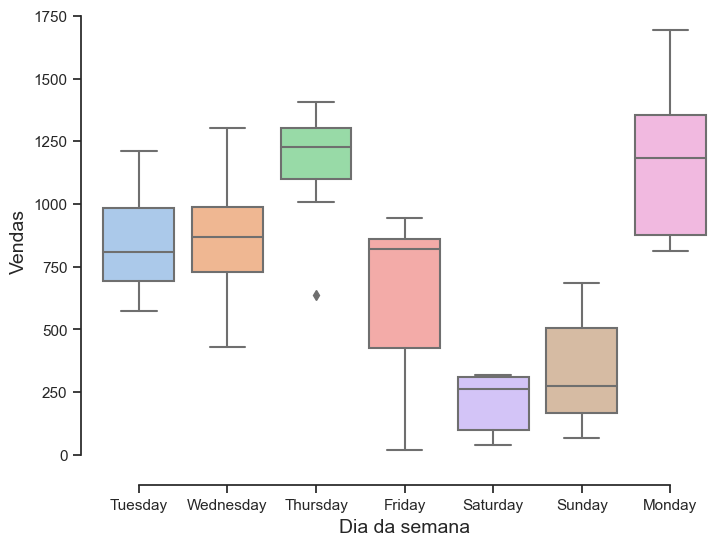

In [12]:
# Criando um plot pra verificar a existência de outliers nos dias da semana
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(8,6))

# plot

sns.boxplot(x = df.dia_semana_nome, y = df.Vendas, data=df)
sns.despine(offset=10, trim=True)
ax.xaxis.set_label_text("Dia da semana",fontdict= {'size':14})
ax.yaxis.set_label_text("Vendas",fontdict= {'size':14})
plt.show()

Nota-se que, em geral, os dados não possuem extremidades e os valores estão dentro da linha de correção

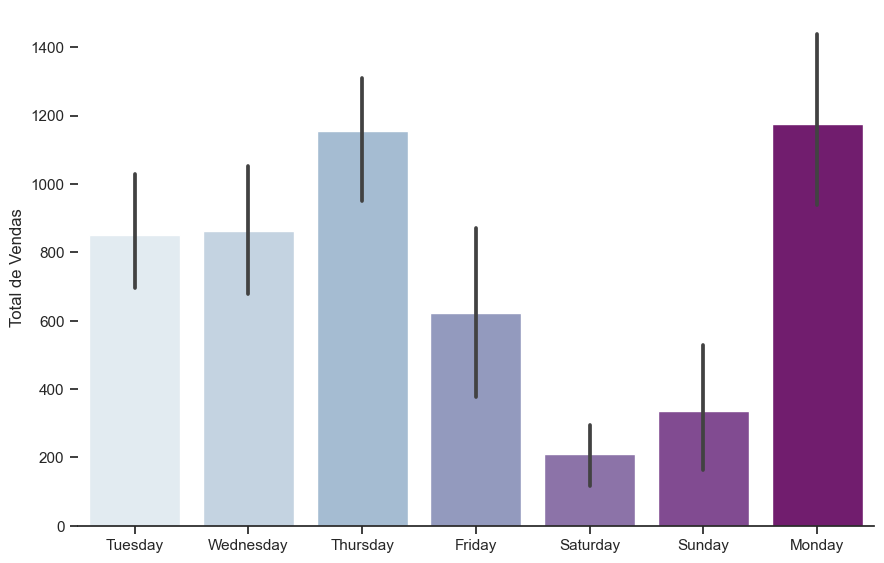

In [13]:
# Criando um gráfico para a distribuição de vendas ao longo dos dias da semana
g = sns.catplot(x="dia_semana_nome", y="Vendas", data=df, kind="bar", palette="BuPu",
            height=6, aspect=1.5)
g.despine(left=True)
g.set_axis_labels("", 'Total de Vendas')

Pelo gráfico, conseguimos notar que os melhores dias de venda são quinta e segunda

## Vamos verificar se existe disparidade entre as semanas do mês

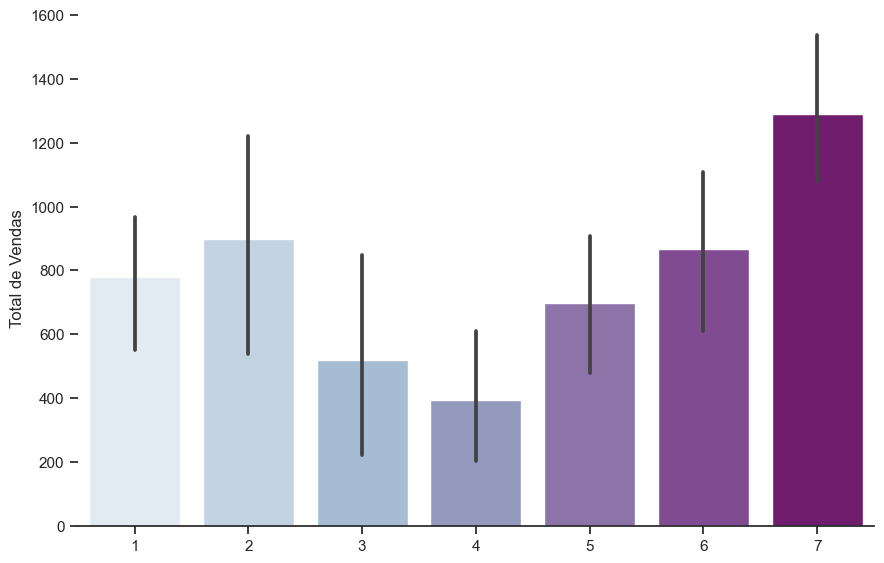

In [14]:
# Criando um gráfico para ver a distribuição por semana
g = sns.catplot(x="semana", y="Vendas", data=df, kind="bar", palette="BuPu",
            height=6, aspect=1.5)
g.despine(left=True)
g.set_axis_labels("", 'Total de Vendas')

O gráfico demonstra um pleno crescimento de vendas nas últimas semanas

In [15]:
df.head()

,Data,dia,semana,mes,dia_semana_num,dia_semana_nome,Vendas
0,2022-12-06,6,1,12,1,Tuesday,870
1,2022-12-07,7,1,12,2,Wednesday,868
2,2022-12-08,8,1,12,3,Thursday,1189
3,2022-12-09,9,1,12,4,Friday,742
4,2022-12-10,10,1,12,5,Saturday,317


In [16]:
df.columns

Index(['Data', 'dia', 'semana', 'mes', 'dia_semana_num', 'dia_semana_nome',
       'Vendas'],
      dtype='object')

<AxesSubplot:xlabel='Data', ylabel='Vendas'>

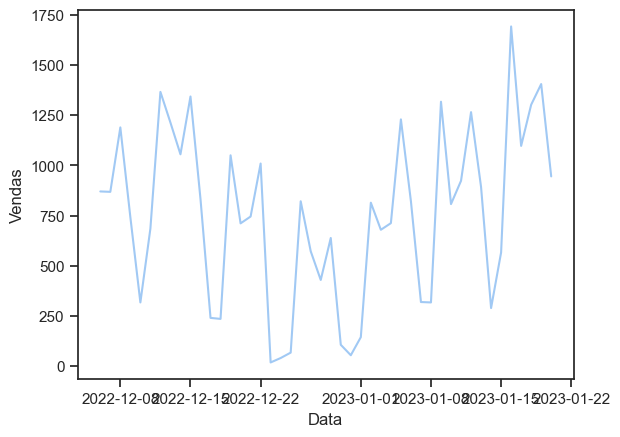

In [17]:
sns.lineplot(x="Data", y="Vendas",data=df)

# Realizando testes de previsões nos dados

# ----------------------------------------

## testando coisas

In [18]:
# Baixando a biblioteca necessaria para fazer a previsão
!pip install pmdarima
from pmdarima.arima import auto_arima


In [19]:
# Importando novamente os dados, mas desta vez usando somente as duas colunas primarias
data_new = pd.read_excel('Dados.xlsx', parse_dates=['Data'], index_col='Data')
data_new.head()

,Vendas
Data,
2022-12-06,870
2022-12-07,868
2022-12-08,1189
2022-12-09,742
2022-12-10,317


In [20]:
# Verificando se os dados são estacionarios
from pmdarima.arima import ADFTest 
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data_new)

(0.32861105775592603, True)

C:\Users\junio\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


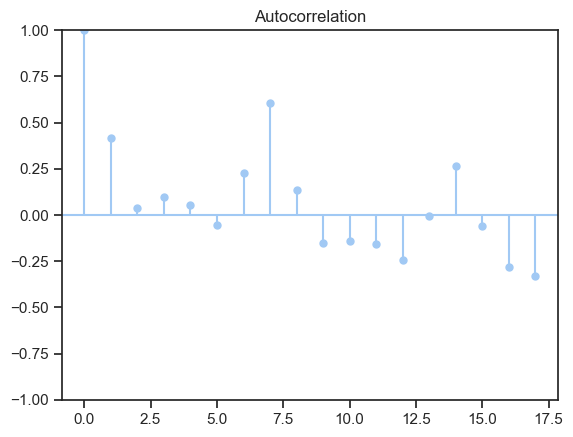

In [21]:
# Plotando um grafico pra verificar se os dados sao constantes
import pmdarima as pm
from pmdarima import datasets

pm.plot_acf(data_new)

Conclui-se tanto pelo gráfico, quando pelo ADF teste que os dados não são estacionarios

In [22]:
test = data_new.copy()
test['diference'] = test['Vendas'] - test['Vendas'].shift(1)

In [23]:
test = test.drop('Vendas', axis=1)
test =test.dropna()


C:\Users\junio\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


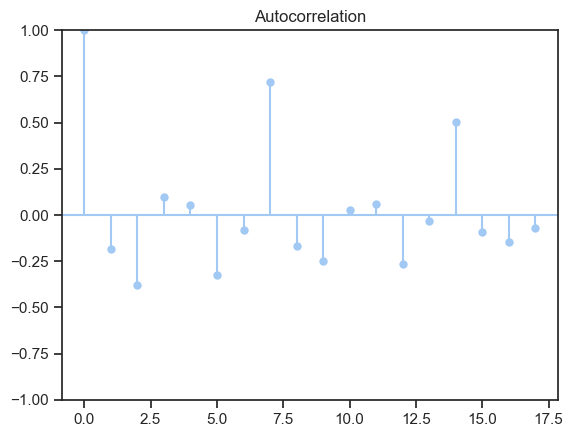

In [24]:
pm.plot_acf(test)

In [25]:
test.info()
test['diference'] = test['diference'].astype(int)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2022-12-07 to 2023-01-20
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   diference  45 non-null     float64
dtypes: float64(1)
memory usage: 720.0 bytes


In [26]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2022-12-06 to 2023-01-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Vendas  46 non-null     int64
dtypes: int64(1)
memory usage: 736.0 bytes


In [27]:
# Criando o modelo com os parametros base,
# considero que a base de dados é sasional
modelo = auto_arima(data_new, start_p = 1, start_q = 1, max_p = 6, m = 7, test = 'pp',
                            max_q = 6, start_P = 0, seasonal = True, d = 1,
                           D = 0, trace = True, error_action = 'ignore',
                            suppress_warnings = True, stepwise = False)
# 625

# modelo = auto_arima(data_new, start_p=1, start_q=1, test='pp',
#                       max_p=6, max_q=6, m=7, seasonal=True, start_P=0, 
#                       D=0, trace=True, error_action='ignore',
#                       suppress_warnings=True, stepwise=False) 
# # 510 



 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=684.150, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=656.944, Time=0.11 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=646.798, Time=0.16 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=631.523, Time=0.09 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=631.061, Time=0.26 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=632.959, Time=0.18 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=676.725, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=645.851, Time=0.30 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=629.608, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=625.348, Time=0.33 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=631.911, Time=0.45 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC

In [28]:
# verificando o indice com melhor perfomance
print(modelo.aic()) 

625.3478155886763


In [29]:
# Separando dados de treino e de teste com % 80 - 20
train = data_new.iloc[0:37]
test = data_new.iloc[37:]

In [30]:
# Treinando o modelo 
modelo.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [31]:
# Fazendo predicoes
predicao = modelo.predict(n_periods = 13)
predicao = pd.DataFrame(predicao, index= test.index, columns = ['Vendas'])

<AxesSubplot:xlabel='Data'>

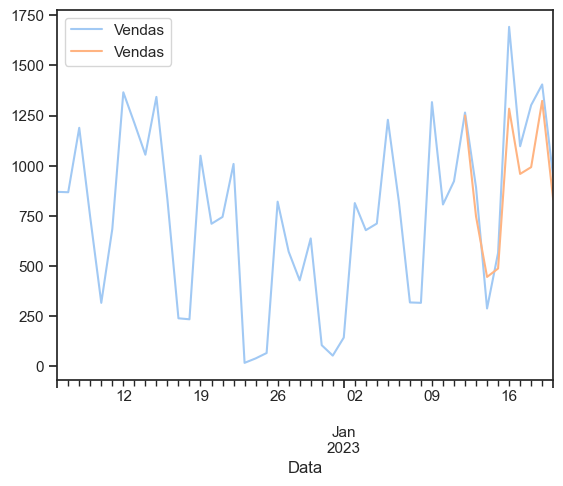

In [32]:
# Realizando um plot de comparacao dos dados previstos e reais

pd.concat([data_new, predicao], axis = 1).plot()

In [33]:
# Verificando os dados base da predicao
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   37
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood                -248.482
Date:                           Wed, 01 Feb 2023   AIC                            506.964
Time:                                   20:57:15   BIC                            514.882
Sample:                               12-06-2022   HQIC                           509.727
                                    - 01-11-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.8772      3.169     -0.277      0.782      -7.089       5.334
ma.L1         -0.2882      0.149     -1.930      0.054      -0.581       0.004
ar.S.L7        0.9749      0.042     23.400      0.000       0.893       1.057
ma.S.L7       -0.5390      0.329     -1.638      0.101      -1.184       0.106
sigma2      3.974e+04   1.18e+04      3.374      0.001    1.67e+04    6.28e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.73   Prob(JB):                         0.78
Heteroskedasticity (H):               1.11   Skew:                            -0.28
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Verificando o indice de acuracia para o processo

from sklearn.metrics import r2_score
test['Predicao'] = predicao.Vendas
test

,Vendas,Predicao
Data,,
2023-01-12,1265,1250.326873
2023-01-13,892,747.210067
2023-01-14,289,446.013454
2023-01-15,566,488.005783
2023-01-16,1692,1284.307319
2023-01-17,1097,959.242570
2023-01-18,1302,993.058550
2023-01-19,1405,1323.170799
2023-01-20,945,831.808194


In [ ]:
print('Acuracia: ', r2_score(test['Vendas'], test['Predicao']))